# Домашнее задание 10

## Тема
Тема 10. Корреляция и корреляционный анализ

## Описание задания
Для выполнения задания используйте датасет Mortality and Water Hardness.

В этом датасете содержатся данные по средней годовой смертности на 100 000 населения и концентрации кальция в питьевой воде для 61 большого города Англии и Уэльса. Города дополнительно поделены на северные и южные.

## Задание 1
Ответьте на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью? Для ответа выполните следующие шаги:

- Постройте точечный график.
- Рассчитайте коэффициенты корреляции Пирсона и Спирмена.
- Постройте модель линейной регрессии.
- Рассчитайте коэффициент детерминации.
- Выведите график остатков.
## Задание 2
Ответьте на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? Для ответ выполните следующие шаги:

- Разделите данные на 2 группы.
- Повторите аналогичные шаги из пункта 1 для каждой группы по отдельности.

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [136]:
df = pd.read_csv('water.csv')
df = df[ ['location', 'town', 'hardness', 'mortality'] ]
df

,location,town,hardness,mortality
0,South,Bath,105,1247
1,North,Birkenhead,17,1668
2,South,Birmingham,5,1466
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
...,...,...,...,...
56,South,Walsall,60,1527
57,South,West Bromwich,53,1627
58,South,West Ham,122,1486
59,South,Wolverhampton,81,1485


<Axes: title={'center': 'Зависимость смертности от жесткости воды'}, xlabel='hardness', ylabel='mortality'>

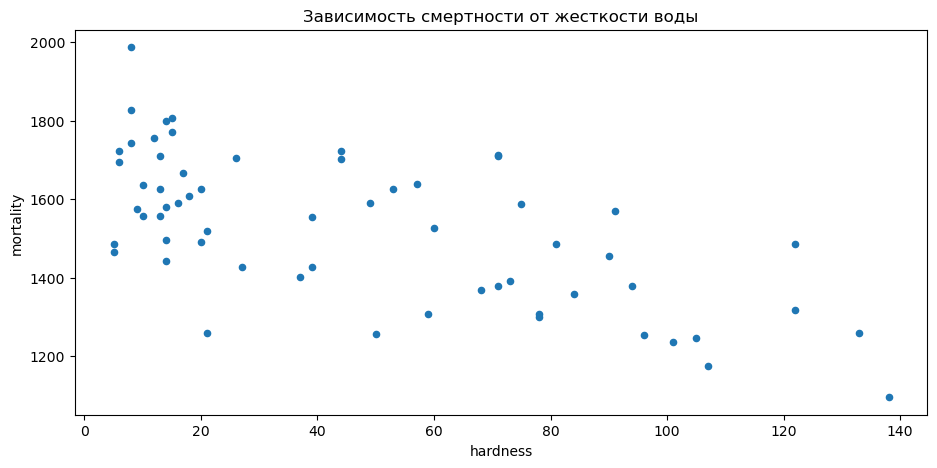

In [137]:
df.plot(kind='scatter', x='hardness',
        y='mortality',
        title = 'Зависимость смертности от жесткости воды')

На графике наблюдается обратная линейная зависимость смертности населения Южных и Северных территорий от степени жёсткости воды. Чем меньше степень жёсткости воды, тем больше смертность.

### Рассчет корреляции Пирсона

In [138]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


### Расчет корреляции Спирмена

In [139]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


### Строим модель линейной регрессии

In [140]:
X = df[['hardness']]
y = df['mortality']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [142]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-3.13167087]
1668.9722977277095


In [143]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [144]:
# Вычисляем значение коэффициента детерминации
model.score(X_test, y_test) 

0.5046490611017092

# коэффициент детерминации низкий, но положительный

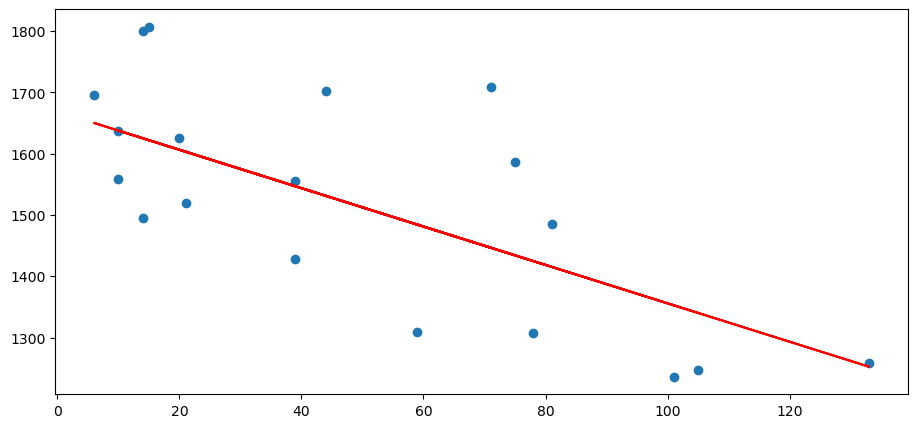

In [145]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Выводим график остатков

In [146]:
import plotly.express as px
x2_train, x2_test = train_test_split(df.index, test_size=.30, random_state=42)
df['split'] = 'train'
df.loc[x2_test, 'split'] = 'test'

x_2 = df[['hardness']]
x_2_train = df.loc[x2_train, ['hardness']]
y2_train = df.loc[x2_train, 'mortality']

model = LinearRegression()
model.fit(x_2_train, y2_train)
df['prediction'] = model.predict(x_2)
df['residual'] = df['prediction'] - df['mortality']

fig = px.scatter(df, x='prediction', y='residual', marginal_y='violin', color='split', 
                 trendline='ols')

fig.update_layout(title={'text': 'График остатков', 'y':0.95, 'x':0.5, 'xanchor': 'center', 
                         'yanchor': 'top'})
fig.show()

### Разделяем данные на две группы (северные и южные города) и повторяем анализ проведенный ранее

### Выделяем данные по южным городам

In [147]:
south = df[df['location'] == 'South']
south.head()

,location,town,hardness,mortality,split,prediction,residual
0,South,Bath,105,1247,test,1340.146856,93.146856
2,South,Birmingham,5,1466,train,1653.313943,187.313943
7,South,Bournemouth,78,1299,train,1424.701970,125.701970
9,South,Brighton,84,1359,train,1405.911944,46.911944
10,South,Bristol,73,1392,train,1440.360324,48.360324


<Axes: title={'center': 'Зависимость смертности от жесткости воды на юге'}, xlabel='hardness', ylabel='mortality'>

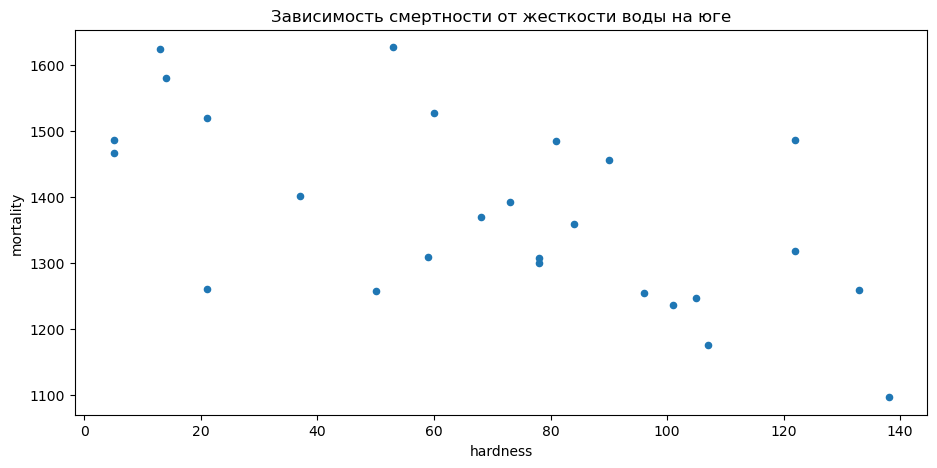

In [148]:
south.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды на юге')

In [149]:

# коэффициент корреляции Пирсона
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [150]:
# коэффициент корреляции Спирмена
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [151]:
X = south[['hardness']]
y = south['mortality']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-3.51342921]
1640.2204603423374


In [153]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [154]:
# Вычисляем значение коэффициента детерминации
model.score(X_test, y_test) 

# коэффициент детерминации отрицательный

-2.551922301235205

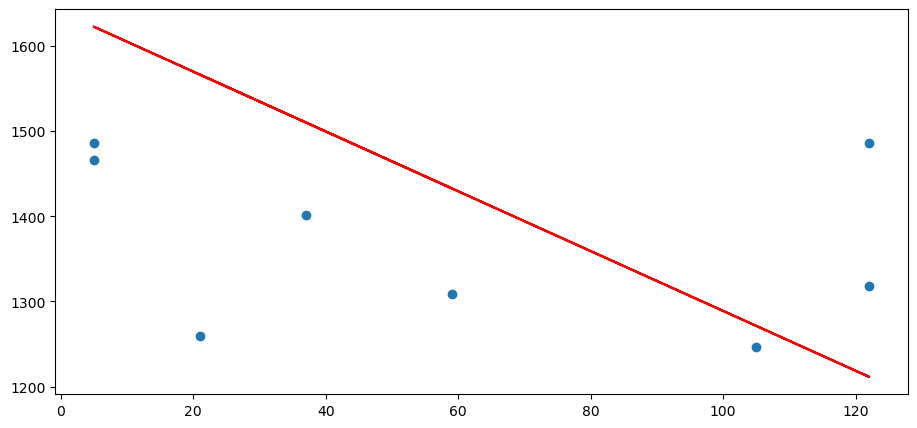

In [155]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

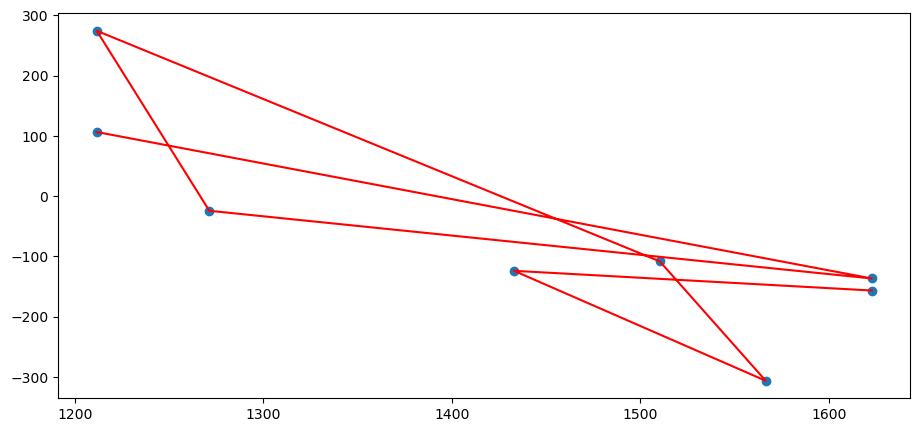

In [156]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

### Анализ для северных территорий

In [157]:
north = df[df['location'] == 'North']
north.head()

,location,town,hardness,mortality,split,prediction,residual
1,North,Birkenhead,17,1668,train,1615.733893,-52.266107
3,North,Blackburn,14,1800,test,1625.128906,-174.871094
4,North,Blackpool,18,1609,train,1612.602222,3.602222
5,North,Bolton,10,1558,test,1637.655589,79.655589
6,North,Bootle,15,1807,test,1621.997235,-185.002765


<Axes: title={'center': 'Зависимость смертности от жесткости воды на севере'}, xlabel='hardness', ylabel='mortality'>

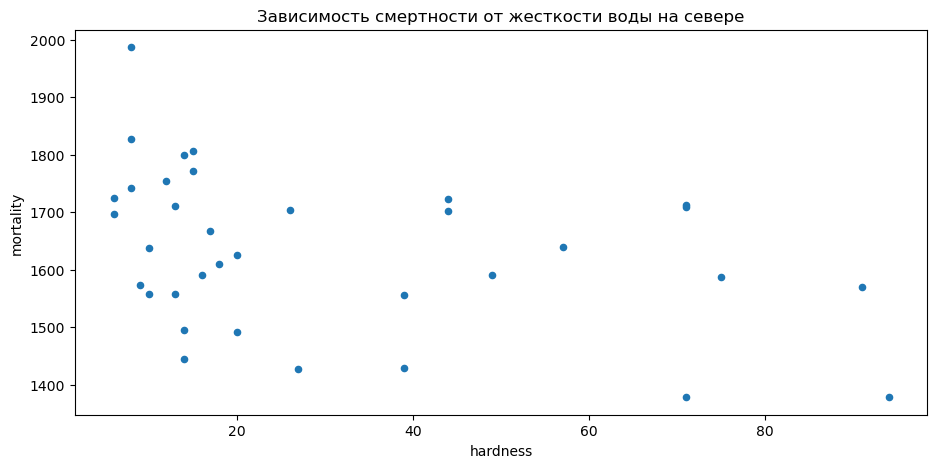

In [158]:
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды на севере')

In [159]:
# коэффициент корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [160]:
# коэффициент корреляции Спирмена
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [161]:
X = north[['hardness']]
y = north['mortality']


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-1.97686226]
1688.1502290312808


In [163]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [164]:
# Вычисляем значение коэффициента детерминации
model.score(X_test, y_test) 

# коэффициент близок к нулю

0.01888530428574564

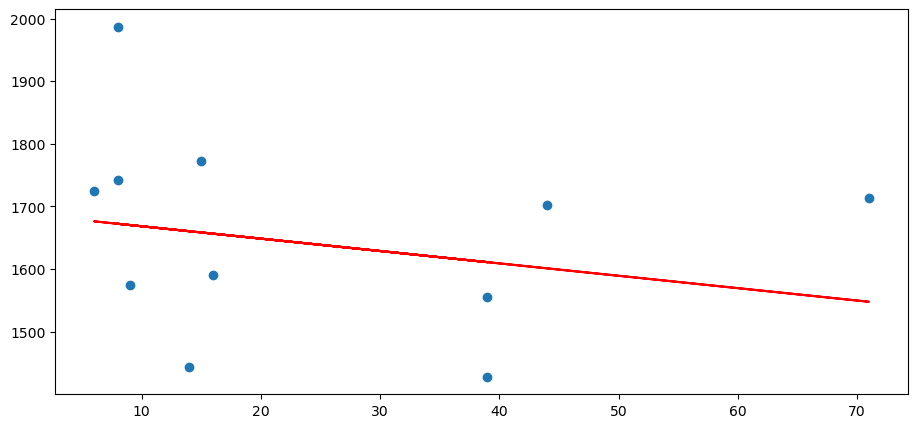

In [165]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

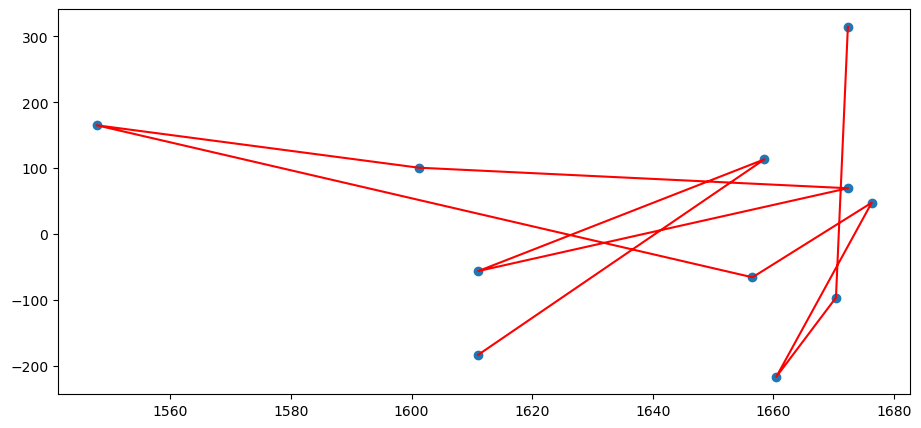

In [166]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

<Axes: title={'center': 'Зависимость смертности от жесткости воды на севере'}, xlabel='hardness', ylabel='mortality'>

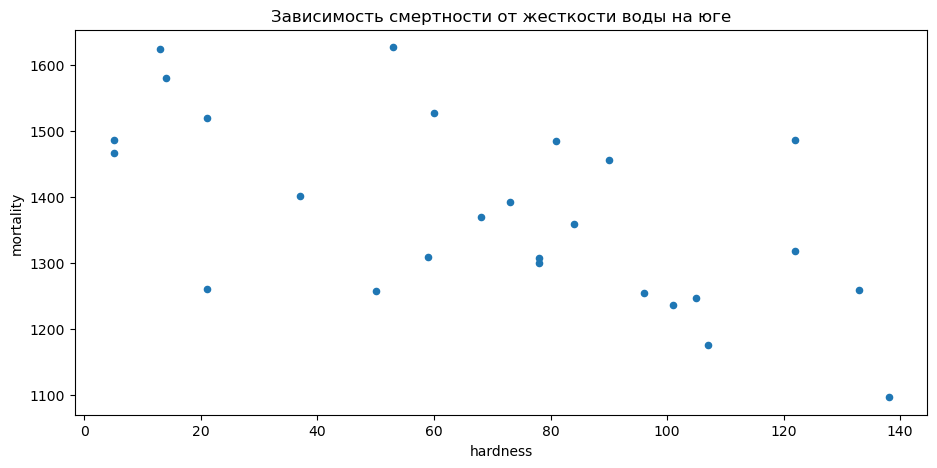

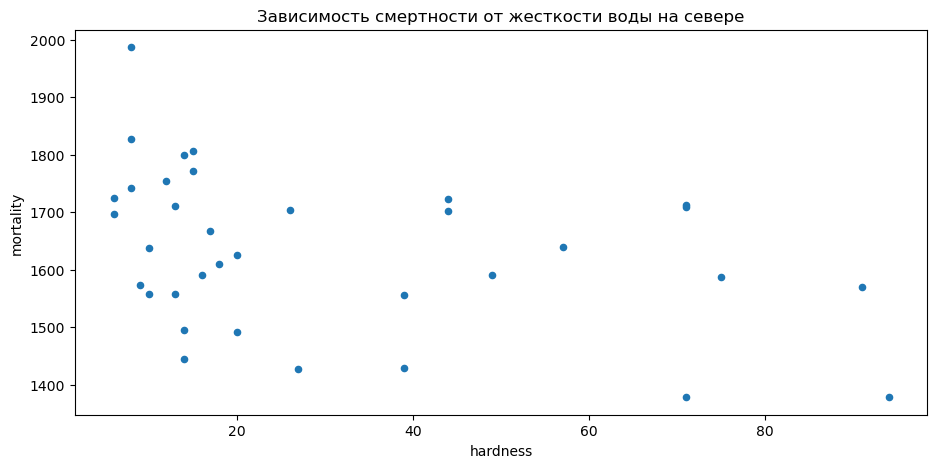

In [167]:
south.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды на юге')
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды на севере')

Сравнивая графики построенные на данных после разделения на север и юг видно, что на графике южной территории данные распределены равномерно, а на севере наблюдается более плотное распределение данных с млой стпенью жнескости воды и большей смертностью. Соответственно, можно сказать, что на севере больше локаций с маленькой степенью жесткости воды